## 앙상블 모델과 단일 모델 성능 비교 <hr>
- 데이터 : sklearn.datasets 의 breast_cancer
- 유형 : 지도학습 + 분류
- 방법 : LogisticRegression, DecisionTree, RandomForest

(1) 모듈 로딩 및 데이터 준비

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

In [2]:
x, y = cancerDF = load_breast_cancer(as_frame=True, return_X_y=True)

In [3]:
x.shape, y.shape

((569, 30), (569,))

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5, stratify=y)

(2) 학습 진행

(2-1) 선형 회귀 LogisticRegression

In [5]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

(2-2) Decsision Tree

In [6]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

(2-3) Random Forest

In [8]:
# 모델은 같으나(1가지), 다른 데이터셋
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=5, oob_score=True)
rf_model.fit(x_train,y_train)

RandomForestClassifier(random_state=5)

3개 알고리즘에 대한 평가

In [9]:
print(f'[LogisticRegression] Train : {lr_model.score(x_train, y_train)}, Test : {lr_model.score(x_test, y_test)}')
print(f'[DecisionTreeClassifier] Train : {dt_model.score(x_train, y_train)}, Test : {dt_model.score(x_test, y_test)}')
print(f'[RandomForestClassifier] Train : {rf_model.score(x_train, y_train)}, Test : {rf_model.score(x_test, y_test)}')

[LogisticRegression] Train : 0.9582417582417583, Test : 0.9649122807017544
[DecisionTreeClassifier] Train : 1.0, Test : 0.9035087719298246
[RandomForestClassifier] Train : 1.0, Test : 0.9649122807017544


In [18]:
featuresDF = pd.DataFrame([rf_model.feature_names_in_, rf_model.feature_importances_])
featuresDF = featuresDF.T
featuresDF.set_index(0, inplace=True)

In [23]:
featuresDF.sort_values(by=1, ascending=True, inplace=True)

<Axes: ylabel='0'>

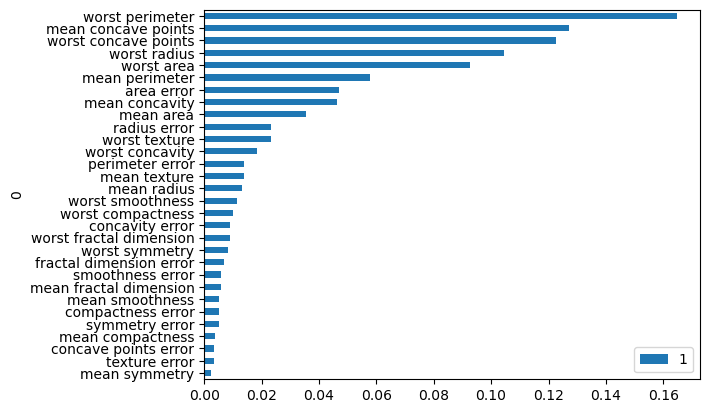

In [24]:
featuresDF.plot(kind='barh')